In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
# dataset 

df = pd.read_csv('data/Task2FinalDataset.csv')
df.head()

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,07/11/2020 9:43,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,06/01/2021 19:13,photo,studying,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,09/04/2021 2:46,photo,studying,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,28/03/2021 21:15,photo,healthy eating,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,04/08/2020 5:40,photo,healthy eating,negative,0


---

### Top 5 Categories

In [3]:
top_5 = df.groupby('Category')['Score'].sum().sort_values(ascending = False).to_frame()[:5]
top_5

,Score
Category,
animals,74965
science,71168
healthy eating,69339
technology,68738
food,66676


> The top five (5) content categories is animals, science, healthy eating, technology, and food.

### Total Unique Categories

In [4]:
df['Category'].nunique()

16

> There are 16 unique categories in the content uploaded in Social Buzz.

### Total Number of Reactions of the Most Popular Category
- How many reactions are there to the most popular category?

In [5]:
# count how many content ids in animal category

In [6]:
df.groupby('Category')['Score'].count().sort_values(ascending = False).to_frame()[:1]

,Score
Category,
animals,1897


In [7]:
# using a counter

df['Count'] = 1
df.groupby(['Category']).count()['Count'].to_frame()[:1]

,Count
Category,
animals,1897


In [8]:
# getting all content_ids with 'animals' as category

# animal_category.iloc[:, [0, 4]]

In [9]:
# getting all entries with 'animals' as category

# animal_category = df.loc[df['Category'] == "animals"]
# animal_category

---

### Total Number of Posts per Month
- What was the month with the most posts?

In [10]:
df.head(1)

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score,Count
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,07/11/2020 9:43,photo,studying,negative,0,1


In [11]:
# converting object 'Datetime' to datetime dtype

df['Datetime'] = pd.to_datetime(df['Datetime'], format = '%d/%m/%Y %H:%M')
df['Datetime'].to_frame().head()

,Datetime
0,2020-11-07 09:43:00
1,2021-01-06 19:13:00
2,2021-04-09 02:46:00
3,2021-03-28 21:15:00
4,2020-08-04 05:40:00


In [12]:
df['Month'] = df['Datetime'].dt.month
df.head()

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score,Count,Month
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:00,photo,studying,negative,0,1,11
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:00,photo,studying,negative,0,1,1
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:00,photo,studying,negative,0,1,4
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:00,photo,healthy eating,negative,0,1,3
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:00,photo,healthy eating,negative,0,1,8


In [13]:
df.groupby('Month')['Count'].count().sort_values(ascending = False).to_frame()

,Count
Month,
5,2138
1,2126
8,2114
12,2092
7,2070
10,2056
11,2034
9,2022
6,2021


> The month of May has the most posts with 2138 posts.

---

## Data Visualization

In [14]:
top_5

,Score
Category,
animals,74965
science,71168
healthy eating,69339
technology,68738
food,66676


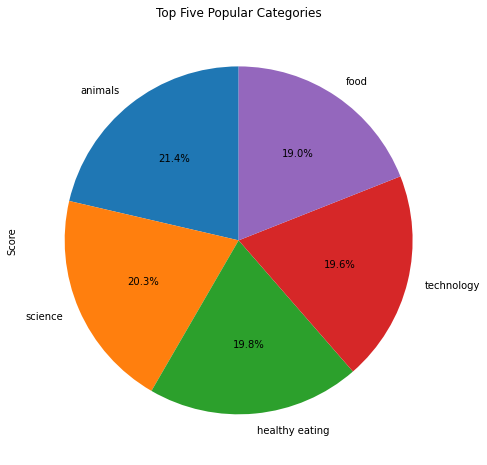

In [15]:
# Creating plot

top_5.plot(kind = 'pie', subplots = True, figsize = (8, 8), startangle = 90, autopct = '%0.1f%%', legend = False)
plt.title("Top Five Popular Categories")
 
# show plot
plt.show()